In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
# df['area'] = df['area']/1000
# x = df.drop(['price'],axis=1)
# x = df.iloc[:,1:]
# y = df['price']/1000000
x
# ,y.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7.420000e-33,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8.960000e-33,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9.960000e-33,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7.500000e-33,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7.420000e-33,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3.000000e-33,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2.400000e-33,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3.620000e-33,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2.910000e-33,3,1,1,no,no,no,no,no,0,no,furnished


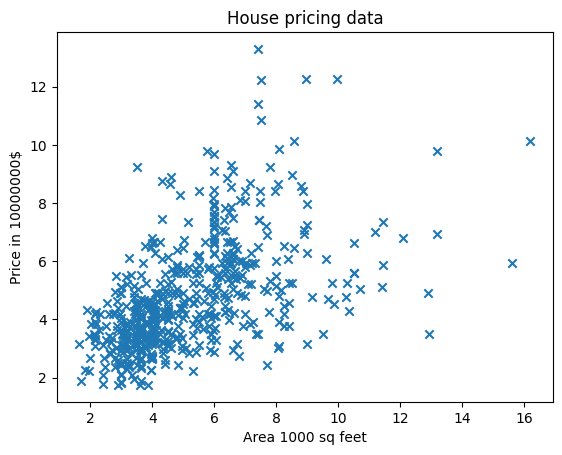

In [5]:
plt.scatter(x,y,marker='x')
plt.xlabel('Area 1000 sq feet')

plt.ylabel('Price in 10000000$')
plt.title('House pricing data')
plt.show()

In [6]:
def simple_linear_regression(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x-x_mean )* (y-y_mean))
    denominator = np.sum((x-x_mean)**2)
    slope = numerator / denominator
    
    intercept = y_mean - (slope * x_mean)
    return slope,intercept

In [7]:
def predict(slope,intercept,x):
    return slope*x + intercept

In [8]:
slope,intercept = simple_linear_regression(x,y)
print(slope,intercept)
new_x = np.array([7.24,8.96,9.96])
prediction = predict(slope,intercept,new_x)
prediction

0.46197489427278343 2.387308482396431


array([5.73200672, 6.52660354, 6.98857843])

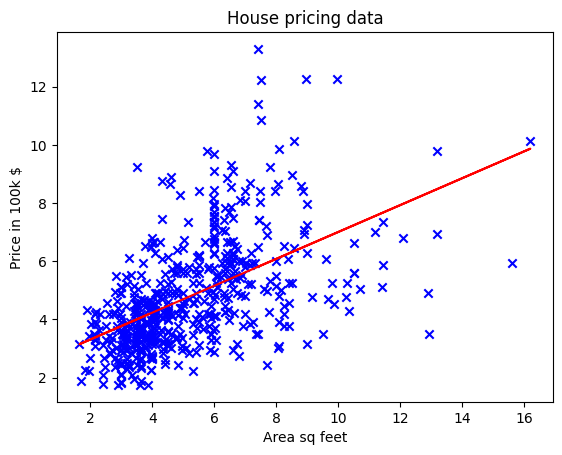

In [9]:
plt.scatter(x,y,marker='x',label='Data points',color='blue')
plt.plot(x,slope * x + intercept,label='Linear Regression',color='red')
plt.xlabel('Area sq feet')
plt.ylabel('Price in 100k $')
plt.title('House pricing data')
plt.show()

**Gradient descent**

intial m, intial 

f_wb =  m * x + b

cost = (y - f_wb)

dj/dm += cost * x[i]

dj/db += cost 

m = m - (alpha * ((1/m) * dj/dm))

b = b - (alpha * ((1/m) * dj/db))


In [10]:
def compute_cost(x,y,m,b):
    total_cost =0
    size = m.shape[0]
    for i in range(size):
        f_mb = m * x[i] + b
        total_cost += (f_mb-y[i])**2
    return (1/(2*m)) *total_cost        

In [11]:
def get_dervatives(x,y,m,b):
    size =  x.shape[0]
    dj_dm =0
    dj_db=0
    # total_cost =0
    for i in range(size):
        f_wb = m * x[i] + b
        cost = f_wb - y[i]
        # total_cost +=cost
        dj_dm += (cost * x[i])
        dj_db += cost
    dj_dm/=size
    dj_db/=size
    return dj_dm, dj_db

In [20]:
def compute_gradient_descent(x,y,m_initial=0,b_intial=0,alpha=0.001,iterations = 1000):
    m= m_initial
    b = b_intial
    for i in range(iterations):
     dj_dm, dj_db = get_dervatives(x,y,m,b)
     m = m - (alpha * dj_dm)
     b = b -(alpha * dj_db)
    
    return m,b
    

In [21]:
m,b = compute_gradient_descent(x,y)


In [22]:
m,b,slope,intercept,m==slope,intercept==b
# (0.46197489427278343,
#  2.387308482396431,
#  0.46197489427278343,
#  2.387308482396431)

(0.7838507222891373,
 0.44485630263086495,
 0.46197489427278343,
 2.387308482396431,
 False,
 False)

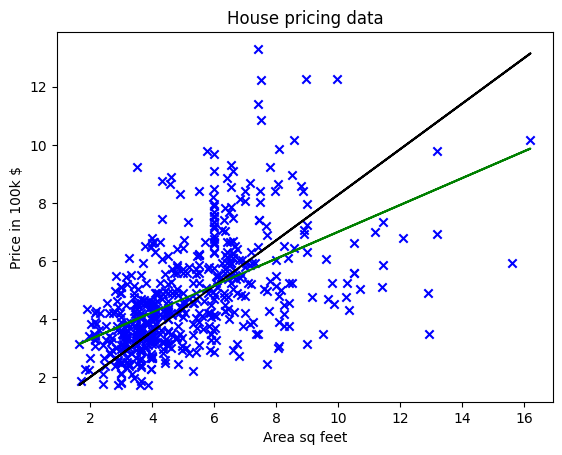

In [23]:
plt.scatter(x,y,marker='x',label='Data points',color='blue')
plt.plot(x,m * x + b,label='Linear Regression with gradient descent',color='black')
plt.plot(x,slope * x + intercept,label='Linear Regression with gradient descent',color='green')
plt.xlabel('Area sq feet')
plt.ylabel('Price in 100k $')
plt.title('House pricing data')
plt.show()

In [24]:
new_x = np.array([7.24,8.96,9.96])
prediction = predict(m,b,new_x)
prediction

array([6.11993553, 7.46815877, 8.2520095 ])

In [18]:
compute_cost(x,y,m,b), compute_cost(x,y,slope,intercept)

IndexError: tuple index out of range